In [2]:
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#### Extracting pixels from images

In [79]:
directory_train = "cat_dog_1/train"
files_train = [os.path.join(directory_train,f) for f in sorted(os.listdir(directory_train)) if f!=".DS_Store"]
files_train[:5]

['cat_dog_1/train/cat.0.jpg',
 'cat_dog_1/train/cat.1.jpg',
 'cat_dog_1/train/cat.10.jpg',
 'cat_dog_1/train/cat.100.jpg',
 'cat_dog_1/train/cat.1000.jpg']

In [80]:
directory_test = "cat_dog_1/test"
files_test = [os.path.join(directory_test,f) for f in sorted(os.listdir(directory_test)) if f!=".DS_Store"]
files_test[:5]

['cat_dog_1/test/cat.3500.jpg',
 'cat_dog_1/test/cat.3501.jpg',
 'cat_dog_1/test/cat.3502.jpg',
 'cat_dog_1/test/cat.3503.jpg',
 'cat_dog_1/test/cat.3504.jpg']

In [81]:
height,width = 128,128

In [82]:
images = []
classes = []
for image_path in files_train:
    image = cv2.imread(image_path)
    (H,W) = image.shape[:2]
    image = cv2.resize(image,(width,height))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.ravel()
    images.append(image)
    if "cat" in image_path.split("/")[2]:
        class_name = 0
    else:
        class_name = 1
    classes.append(class_name)
len(classes),len(images)

(4000, 4000)

In [83]:
X_train = np.asarray(images)
y_train = np.asarray(classes)

In [84]:
X_train.shape,y_train.shape

((4000, 16384), (4000,))

In [85]:
images = []
classes = []
for image_path in files_test:
    image = cv2.imread(image_path)
    (H,W) = image.shape[:2]
    image = cv2.resize(image,(width,height))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.ravel()
    images.append(image)
    if "cat" in image_path.split("/")[2]:
        class_name = 0
    else:
        class_name = 1
    classes.append(class_name)
len(classes),len(images)

(1000, 1000)

In [86]:
X_test = np.asarray(images)
y_test = np.asarray(classes)

In [87]:
X_test.shape,y_test.shape

((1000, 16384), (1000,))

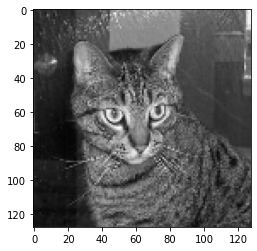

In [88]:
sample = X_train[1].reshape(width,height)
plt.imshow(sample,cmap='gray');

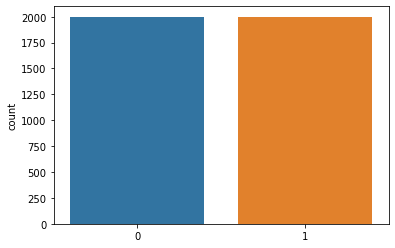

In [89]:
sns.countplot(y_train);

In [90]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([2000, 2000]))

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)
X_train[0]

array([0.65490196, 0.67843137, 0.68235294, ..., 0.00393701, 0.00784314,
       0.00393701])

In [69]:
# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 16384 -> 8193 -> 8193 -> 1
model1 = Sequential()
model1.add(Dense(input_shape=(16384,),units=100,activation="relu"))
model1.add(Dense(units=100,activation="relu"))
model1.add(Dense(units=1,activation = "sigmoid"))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               1638500   
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 1,648,701
Trainable params: 1,648,701
Non-trainable params: 0
_________________________________________________________________


In [93]:
model1.compile(optimizer="Adam",
               loss="binary_crossentropy",
               metrics=["accuracy"])

In [94]:
history = model1.fit(X_train,y_train,epochs=20)

Epoch 1/20
125/125 [==============================] - 1s 5ms/step - loss: 0.8175 - accuracy: 0.5230
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.7345 - accuracy: 0.5345
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.6827 - accuracy: 0.5655
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.6775 - accuracy: 0.5740
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.6842 - accuracy: 0.5625
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.6790 - accuracy: 0.5680
Epoch 7/20
125/125 [==============================] - 1s 4ms/step - loss: 0.6687 - accuracy: 0.5770
Epoch 8/20
125/125 [==============================] - 1s 5ms/step - loss: 0.6795 - accuracy: 0.5385
Epoch 9/20
125/125 [==============================] - 1s 4ms/step - loss: 0.6693 - accuracy: 0.5790
Epoch 10/20
125/125 [==============================] - 1s 4ms/step - loss: 0.6645 - accuracy: 0.5878

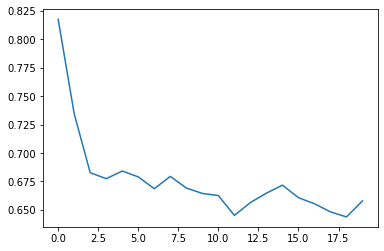

In [95]:
plt.plot(history.history["loss"]);

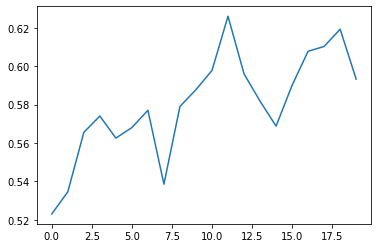

In [96]:
plt.plot(history.history["accuracy"]);

In [97]:
predictions = model1.predict(X_test)
predictions[:3]

array([[6.526594e-37],
       [0.000000e+00],
       [7.686278e-37]], dtype=float32)

In [98]:
predictions = (predictions>0.5)
predictions[:3]

array([[False],
       [False],
       [False]])

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test,predictions)

0.557

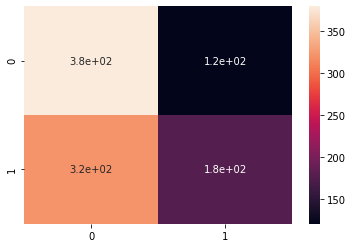

In [100]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True);

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.54      0.76      0.63       500
           1       0.60      0.36      0.45       500

    accuracy                           0.56      1000
   macro avg       0.57      0.56      0.54      1000
weighted avg       0.57      0.56      0.54      1000



In [102]:
model1.predict(X_test[0].reshape(1,-1))

array([[6.5262456e-37]], dtype=float32)